In [91]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, interact_manual, fixed
from IPython.html import widgets
from IPython.display import display

PI2 = 2 * math.pi

2.2  A sawtooth signal has a waveform that ramps up linearly from
-1 to 1, then drops to -1 and repeats. See http://en.wikipedia.org/wiki/
Sawtooth_wave
Write a class called SawtoothSignal that extends Signal and provides
evaluate to evaluate a sawtooth signal.
Compute the spectrum of a sawtooth wave. How does the harmonic structure
compare to triangle and square waves?

톱니파 신호 클래스 구현

In [92]:
class SawtoothSignal(thinkdsp.Sinusoid):
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / PI2
        frac, _ = np.modf(cycles)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys

In [93]:
sawtooth = SawtoothSignal().make_wave(duration=0.5, framerate=30000)
sawtooth.make_audio()

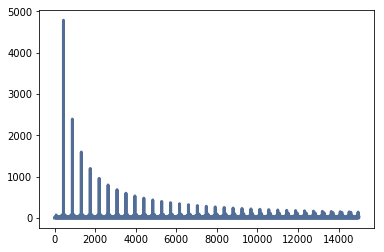

In [94]:
sawtooth.make_spectrum().plot()
#톱니파 스펙트럼

톱니파의 하모닉 구조가 삼각파와 사각파와 어떤 점에서 차이가 있는지 확인.
톱니파는 빨간색 스펙트럼

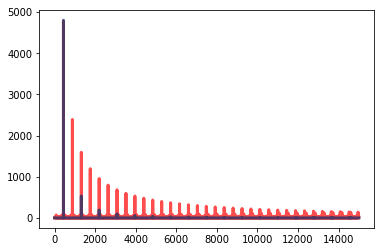

In [95]:
sawtooth.make_spectrum().plot(color='red')
triangle = thinkdsp.TriangleSignal(amp=0.79).make_wave(duration=0.5, framerate=30000)
triangle.make_spectrum().plot()

톱니파는 삼각파보다 빨리 천천히 감소하는 경향을 보인다. 

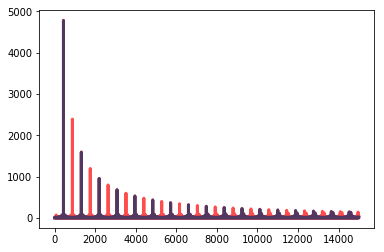

In [96]:
sawtooth.make_spectrum().plot(color='red')
square = thinkdsp.SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=30000)
square.make_spectrum().plot()

톱니파는 사각파보다 미묘하지만 조금 빠르게 감소한다.

2.3 Make a square signal at 1100 Hz and make a wave that samples
it at 10000 frames per second. If you plot the spectrum, you can see that most of the harmonics are aliased. When you listen to the wave, can you hear the aliased harmonics?

주파수 1100, 사각파형

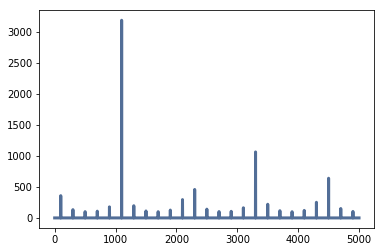

In [97]:
signal = thinkdsp.SquareSignal(1100).make_wave(duration=0.5, framerate=10000) #반복 0.5, 프레임레이트 10000
signal.make_spectrum().plot()

Harmonics 구조에 기반하여 1100Hz를 고주파로 설정하고 스펙트럼을 plot하게되면 기본 주파수(fundamental frequency)는 고주파의 홀수배만큼 나타난다. 1100Hz에서는 1100,3300Hz에서 고주파는 잘 나타났지만 다음 기본 주파수는 5500Hz가 아닌 4500Hz에서 나타나는 앨리어싱 현상이 일어났다.

In [98]:
signal.make_audio() 